In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [322]:
import json

# Path to your JSON file
file_path = '/Users/farhadabasahl/sorrentum/sorrentum_sandbox/spring2024/data/cryptocurrency_data.json'

# Load the JSON data from the file
with open(file_path, 'r') as file:
    data = json.load(file)

# Print the type and possibly the keys if it's a dictionary
print(type(data['data']))
if isinstance(data['data'], dict):
    print(data['data'].keys())

<class 'dict'>
dict_keys(['ADA', 'AXS', 'BTC', 'ENJ', 'ETH', 'INJ', 'LINK', 'MANA', 'MATIC', 'RNDR', 'SOL', 'USDT', 'VARA', 'VTHO'])


In [323]:
# Check if the 'results' key exists and access its first item
if 'results' in data['data']:
    first_item = data['data']['results'][0]
    print(json.dumps(first_item, indent=4))
else:
    print("The expected key 'results' is not found in 'data'.")

The expected key 'results' is not found in 'data'.


In [324]:
import json

# Path to your JSON file
file_path = '/Users/farhadabasahl/sorrentum/sorrentum_sandbox/spring2024/data/cryptocurrency_data.json'

# Load the JSON data from the file
with open(file_path, 'r') as file:
    data = json.load(file)

# If data['data'] is a dictionary, print all key-value pairs to understand its structure
if isinstance(data['data'], dict):
    print("Keys in 'data':", data['data'].keys())
    for key, value in data['data'].items():
        print(f"Key: {key} -> Content Preview: {str(value)[:100]}")  # Print a snippet of each value to avoid large output
else:
    print("The 'data' structure is not a dictionary as expected. Actual type:", type(data['data']))

Keys in 'data': dict_keys(['ADA', 'AXS', 'BTC', 'ENJ', 'ETH', 'INJ', 'LINK', 'MANA', 'MATIC', 'RNDR', 'SOL', 'USDT', 'VARA', 'VTHO'])
Key: ADA -> Content Preview: {'id': 2010, 'name': 'Cardano', 'symbol': 'ADA', 'slug': 'cardano', 'num_market_pairs': 1150, 'date_
Key: AXS -> Content Preview: {'id': 6783, 'name': 'Axie Infinity', 'symbol': 'AXS', 'slug': 'axie-infinity', 'num_market_pairs': 
Key: BTC -> Content Preview: {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11017, 'date_ad
Key: ENJ -> Content Preview: {'id': 2130, 'name': 'Enjin Coin', 'symbol': 'ENJ', 'slug': 'enjin-coin', 'num_market_pairs': 409, '
Key: ETH -> Content Preview: {'id': 1027, 'name': 'Ethereum', 'symbol': 'ETH', 'slug': 'ethereum', 'num_market_pairs': 8859, 'dat
Key: INJ -> Content Preview: {'id': 7226, 'name': 'Injective', 'symbol': 'INJ', 'slug': 'injective', 'num_market_pairs': 366, 'da
Key: LINK -> Content Preview: {'id': 1975, 'name': 'Chainlink', 'symbol': 'LINK', 'slu

In [325]:
import pandas as pd

# Loading and normalizing the data for each cryptocurrency
cryptos = {}
for key in data['data'].keys():
    # Normalize the data for each cryptocurrency and store it in a dictionary of DataFrames
    cryptos[key] = pd.json_normalize(data['data'][key])

    # Convert 'last_updated' to datetime format for better handling in plots
    if 'quote_USD_last_updated' in cryptos[key].columns:
        cryptos[key]['quote_USD_last_updated'] = pd.to_datetime(cryptos[key]['quote_USD_last_updated'])
    
    # Convert 'price' to numeric for plotting if present
    if 'quote_USD_price' in cryptos[key].columns:
        cryptos[key]['quote_USD_price'] = pd.to_numeric(cryptos[key]['quote_USD_price'], errors='coerce')
    
    # Print head for verification
    print(f"Data for {key}:", cryptos[key].head())

Data for ADA:      id     name symbol     slug  num_market_pairs                date_added  \
0  2010  Cardano    ADA  cardano              1150  2017-10-01T00:00:00.000Z   

                                                tags   max_supply  \
0  [dpos, pos, platform, research, smart-contract...  45000000000   

   circulating_supply  total_supply  ...  quote.USD.percent_change_24h  \
0        3.563396e+10  3.681293e+10  ...                      -2.45769   

   quote.USD.percent_change_7d quote.USD.percent_change_30d  \
0                    10.756698                   -21.368022   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                    -13.204905                      6.398086   

  quote.USD.market_cap quote.USD.market_cap_dominance  \
0         1.799063e+10                         0.7317   

  quote.USD.fully_diluted_market_cap quote.USD.tvl    quote.USD.last_updated  
0                       2.271930e+10          None  2024-04-24T01:14:00.000Z  

[1 ro

KeyError: 'quote_USD_last_updated'

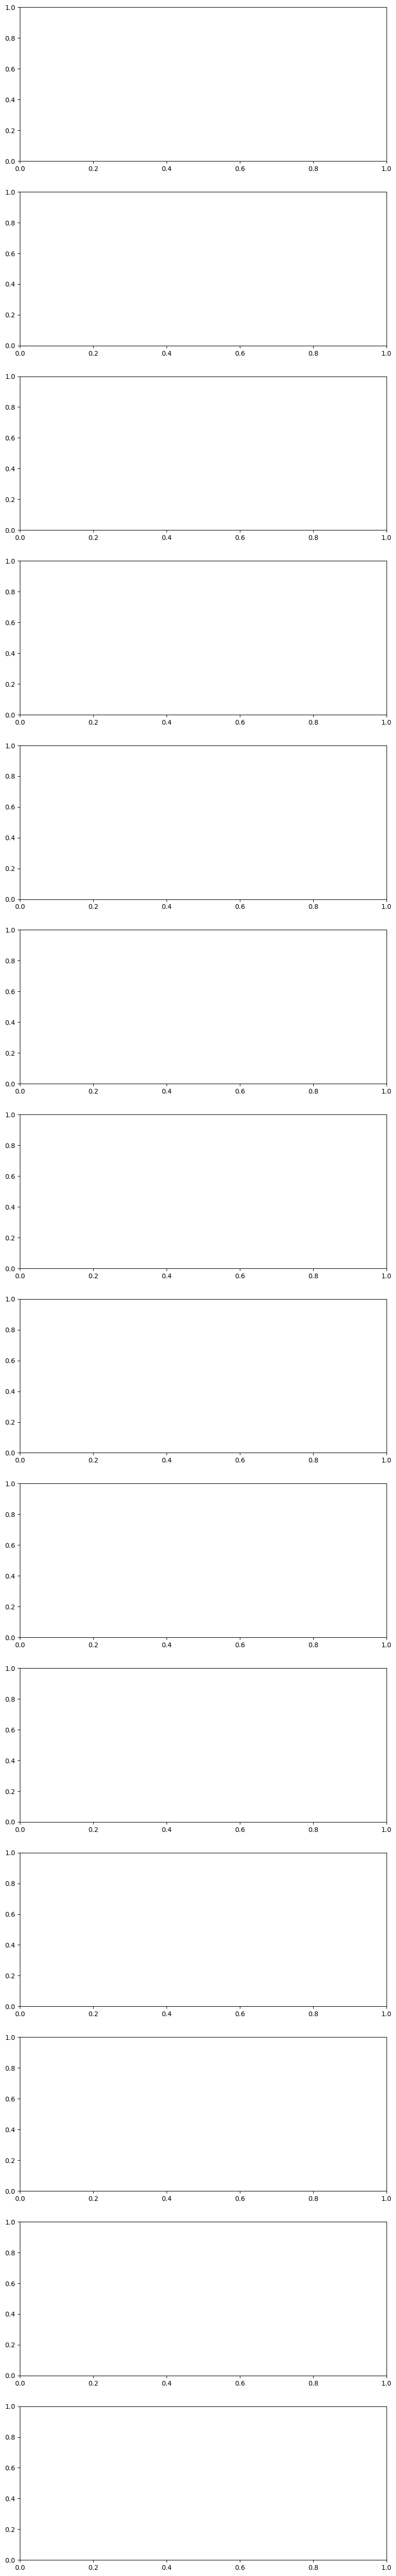

In [326]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(cryptos), 1, figsize=(10, 5 * len(cryptos)))

for i, (key, df) in enumerate(cryptos.items()):
    axs[i].plot(df['quote_USD_last_updated'], df['quote_USD_price'])
    axs[i].set_title(f'Price Trend of {key}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price (USD)')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [327]:
for key, df in cryptos.items():
    print(f"Columns in {key}: {df.columns.tolist()}")

Columns in ADA: ['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added', 'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active', 'infinite_supply', 'platform', 'cmc_rank', 'is_fiat', 'self_reported_circulating_supply', 'self_reported_market_cap', 'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h', 'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d', 'quote.USD.market_cap', 'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap', 'quote.USD.tvl', 'quote.USD.last_updated']
Columns in AXS: ['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added', 'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active', 'infinite_supply', 'cmc_rank', 'is_fiat', 'self_reported_circulating_supply', 'self_reported_market_cap', 'tvl_ratio', 'last_updated', 'pl

In [328]:
for key, df in cryptos.items():
    print(f"Columns in {key}: {df.columns.tolist()}")

Columns in ADA: ['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added', 'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active', 'infinite_supply', 'platform', 'cmc_rank', 'is_fiat', 'self_reported_circulating_supply', 'self_reported_market_cap', 'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h', 'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d', 'quote.USD.market_cap', 'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap', 'quote.USD.tvl', 'quote.USD.last_updated']
Columns in AXS: ['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added', 'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active', 'infinite_supply', 'cmc_rank', 'is_fiat', 'self_reported_circulating_supply', 'self_reported_market_cap', 'tvl_ratio', 'last_updated', 'pl

In [329]:
# Assuming you have the dictionary of DataFrames `cryptos` ready
for key, df in cryptos.items():
    print(f"Columns in {key}:", df.columns.tolist())

Columns in ADA: ['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added', 'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active', 'infinite_supply', 'platform', 'cmc_rank', 'is_fiat', 'self_reported_circulating_supply', 'self_reported_market_cap', 'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h', 'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d', 'quote.USD.market_cap', 'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap', 'quote.USD.tvl', 'quote.USD.last_updated']
Columns in AXS: ['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added', 'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active', 'infinite_supply', 'cmc_rank', 'is_fiat', 'self_reported_circulating_supply', 'self_reported_market_cap', 'tvl_ratio', 'last_updated', 'pl

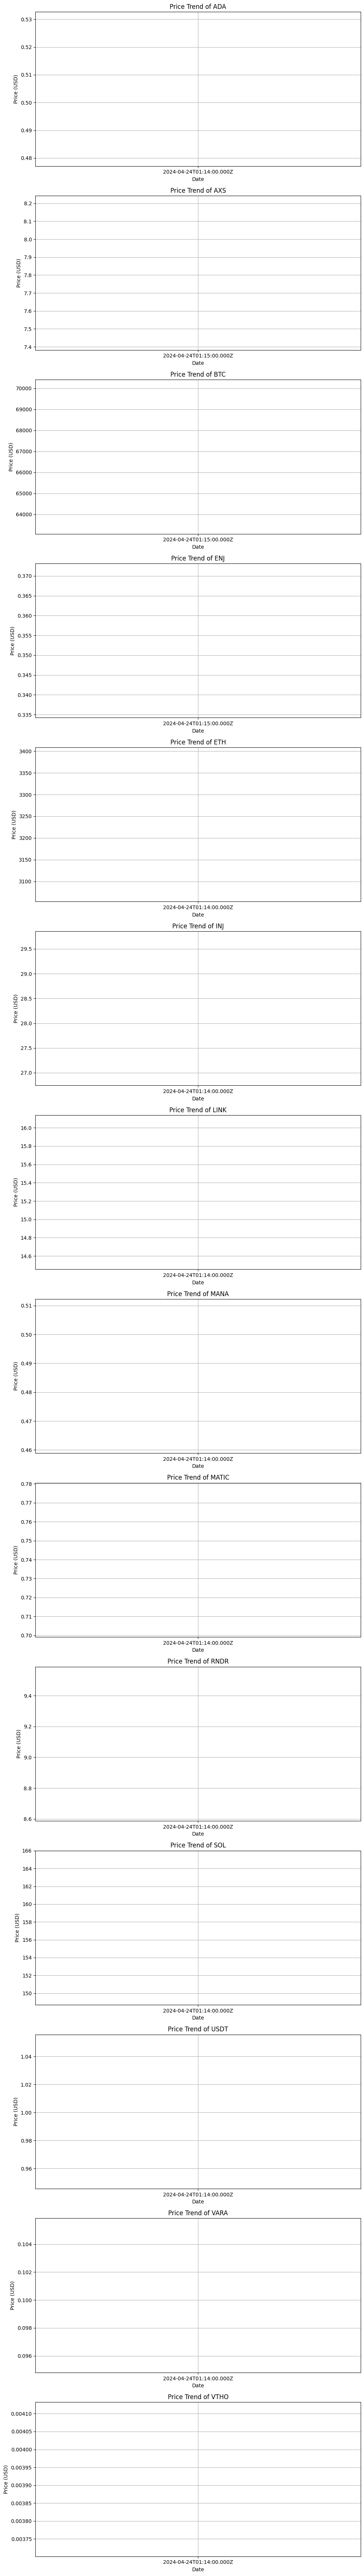

In [330]:
import matplotlib.pyplot as plt

# Adjust the subplot setup if there's only one crypto to prevent indexing errors
single_plot = len(cryptos) == 1
fig, axs = plt.subplots(len(cryptos), 1, figsize=(10, 5 * len(cryptos)), squeeze=False)

for i, (key, df) in enumerate(cryptos.items()):
    if 'quote.USD.last_updated' in df.columns and 'quote.USD.price' in df.columns:
        ax = axs[i][0] if not single_plot else axs[0]
        ax.plot(df['quote.USD.last_updated'], df['quote.USD.price'])
        ax.set_title(f'Price Trend of {key}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price (USD)')
        ax.grid(True)
    else:
        ax = axs[i][0] if not single_plot else axs[0]
        ax.text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center')
        ax.set_title(f'Price Trend of {key}')

plt.tight_layout()
plt.show()

In [331]:
for key, df in cryptos.items():
    # Convert dates to datetime and prices to numeric if not already done
    if 'quote.USD.last_updated' in df.columns:
        df['quote.USD.last_updated'] = pd.to_datetime(df['quote.USD.last_updated'])
    if 'quote.USD.price' in df.columns:
        df['quote.USD.price'] = pd.to_numeric(df['quote.USD.price'], errors='coerce')

In [332]:
for key, df in cryptos.items():
    # Display non-null count, data type, and a few sample values for the columns involved in plotting
    print(f"---{key}---")
    print("Last Updated Info:", df['quote.USD.last_updated'].describe())
    print("Sample Last Updated Dates:", df['quote.USD.last_updated'].dropna().head())
    print("Price Info:", df['quote.USD.price'].describe())
    print("Sample Prices:", df['quote.USD.price'].dropna().head())

---ADA---
Last Updated Info: count                            1
mean     2024-04-24 01:14:00+00:00
min      2024-04-24 01:14:00+00:00
25%      2024-04-24 01:14:00+00:00
50%      2024-04-24 01:14:00+00:00
75%      2024-04-24 01:14:00+00:00
max      2024-04-24 01:14:00+00:00
Name: quote.USD.last_updated, dtype: object
Sample Last Updated Dates: 0   2024-04-24 01:14:00+00:00
Name: quote.USD.last_updated, dtype: datetime64[ns, UTC]
Price Info: count    1.000000
mean     0.504873
std           NaN
min      0.504873
25%      0.504873
50%      0.504873
75%      0.504873
max      0.504873
Name: quote.USD.price, dtype: float64
Sample Prices: 0    0.504873
Name: quote.USD.price, dtype: float64
---AXS---
Last Updated Info: count                            1
mean     2024-04-24 01:15:00+00:00
min      2024-04-24 01:15:00+00:00
25%      2024-04-24 01:15:00+00:00
50%      2024-04-24 01:15:00+00:00
75%      2024-04-24 01:15:00+00:00
max      2024-04-24 01:15:00+00:00
Name: quote.USD.last_updated, dty

In [334]:
import pandas as pd

# Convert 'quote.USD.last_updated' to datetime format correctly
for key, df in cryptos.items():
    print(f"Before conversion, type of date in {key}:", df['quote.USD.last_updated'].dtype)
    df['quote.USD.last_updated'] = pd.to_datetime(df['quote.USD.last_updated'], errors='coerce', utc=True)
    print(f"After conversion, type of date in {key}:", df['quote.USD.last_updated'].dtype)
    print(df['quote.USD.last_updated'].head())  # Check some entries to confirm conversion

Before conversion, type of date in ADA: datetime64[ns, UTC]
After conversion, type of date in ADA: datetime64[ns, UTC]
0   2024-04-24 01:14:00+00:00
Name: quote.USD.last_updated, dtype: datetime64[ns, UTC]
Before conversion, type of date in AXS: datetime64[ns, UTC]
After conversion, type of date in AXS: datetime64[ns, UTC]
0   2024-04-24 01:15:00+00:00
Name: quote.USD.last_updated, dtype: datetime64[ns, UTC]
Before conversion, type of date in BTC: datetime64[ns, UTC]
After conversion, type of date in BTC: datetime64[ns, UTC]
0   2024-04-24 01:15:00+00:00
Name: quote.USD.last_updated, dtype: datetime64[ns, UTC]
Before conversion, type of date in ENJ: datetime64[ns, UTC]
After conversion, type of date in ENJ: datetime64[ns, UTC]
0   2024-04-24 01:15:00+00:00
Name: quote.USD.last_updated, dtype: datetime64[ns, UTC]
Before conversion, type of date in ETH: datetime64[ns, UTC]
After conversion, type of date in ETH: datetime64[ns, UTC]
0   2024-04-24 01:14:00+00:00
Name: quote.USD.last_update

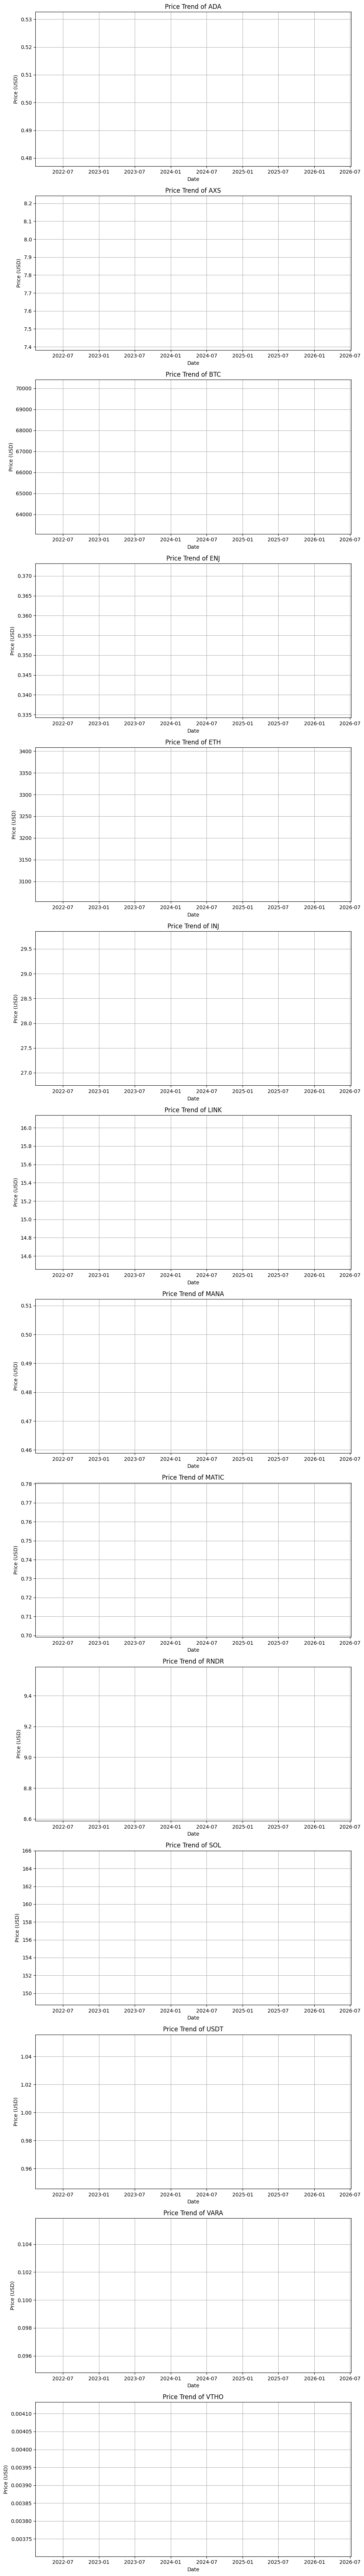

In [335]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(cryptos), 1, figsize=(10, 5 * len(cryptos)), squeeze=False)

for i, (key, df) in enumerate(cryptos.items()):
    ax = axs[i][0] if not single_plot else axs[0]
    # Check if the data contains any valid entries before plotting
    if not df['quote.USD.last_updated'].empty and not df['quote.USD.price'].empty:
        # Filter out any rows where either date or price is NaN
        df_filtered = df.dropna(subset=['quote.USD.last_updated', 'quote.USD.price'])
        if not df_filtered.empty:
            ax.plot(df_filtered['quote.USD.last_updated'], df_filtered['quote.USD.price'])
            ax.set_title(f'Price Trend of {key}')
            ax.set_xlabel('Date')
            ax.set_ylabel('Price (USD)')
            ax.grid(True)
        else:
            ax.text(0.5, 0.5, 'No valid data available for plotting', horizontalalignment='center', verticalalignment='center')
            ax.set_title(f'Price Trend of {key}')
    else:
        ax.text(0.5, 0.5, 'Data not available', horizontalalignment='center', verticalalignment='center')
        ax.set_title(f'Price Trend of {key}')

plt.tight_layout()
plt.show()

In [336]:
for key, df in cryptos.items():
    print(f"--- Data Summary for {key} ---")
    if not df.empty:
        # Check for non-null data and report the range
        valid_dates = df['quote.USD.last_updated'].dropna()
        valid_prices = df['quote.USD.price'].dropna()
        if not valid_dates.empty and not valid_prices.empty:
            print(f"Dates from {valid_dates.min()} to {valid_dates.max()}")
            print(f"Price range from {valid_prices.min()} to {valid_prices.max()}")
        else:
            print("Missing or invalid date/price data.")
    else:
        print("DataFrame is empty.")

--- Data Summary for ADA ---
Dates from 2024-04-24 01:14:00+00:00 to 2024-04-24 01:14:00+00:00
Price range from 0.5048732851266327 to 0.5048732851266327
--- Data Summary for AXS ---
Dates from 2024-04-24 01:15:00+00:00 to 2024-04-24 01:15:00+00:00
Price range from 7.812341374987861 to 7.812341374987861
--- Data Summary for BTC ---
Dates from 2024-04-24 01:15:00+00:00 to 2024-04-24 01:15:00+00:00
Price range from 66744.36726834113 to 66744.36726834113
--- Data Summary for ENJ ---
Dates from 2024-04-24 01:15:00+00:00 to 2024-04-24 01:15:00+00:00
Price range from 0.35367775538741936 to 0.35367775538741936
--- Data Summary for ETH ---
Dates from 2024-04-24 01:14:00+00:00 to 2024-04-24 01:14:00+00:00
Price range from 3231.126573768291 to 3231.126573768291
--- Data Summary for INJ ---
Dates from 2024-04-24 01:14:00+00:00 to 2024-04-24 01:14:00+00:00
Price range from 28.30051214544095 to 28.30051214544095
--- Data Summary for LINK ---
Dates from 2024-04-24 01:14:00+00:00 to 2024-04-24 01:14:0

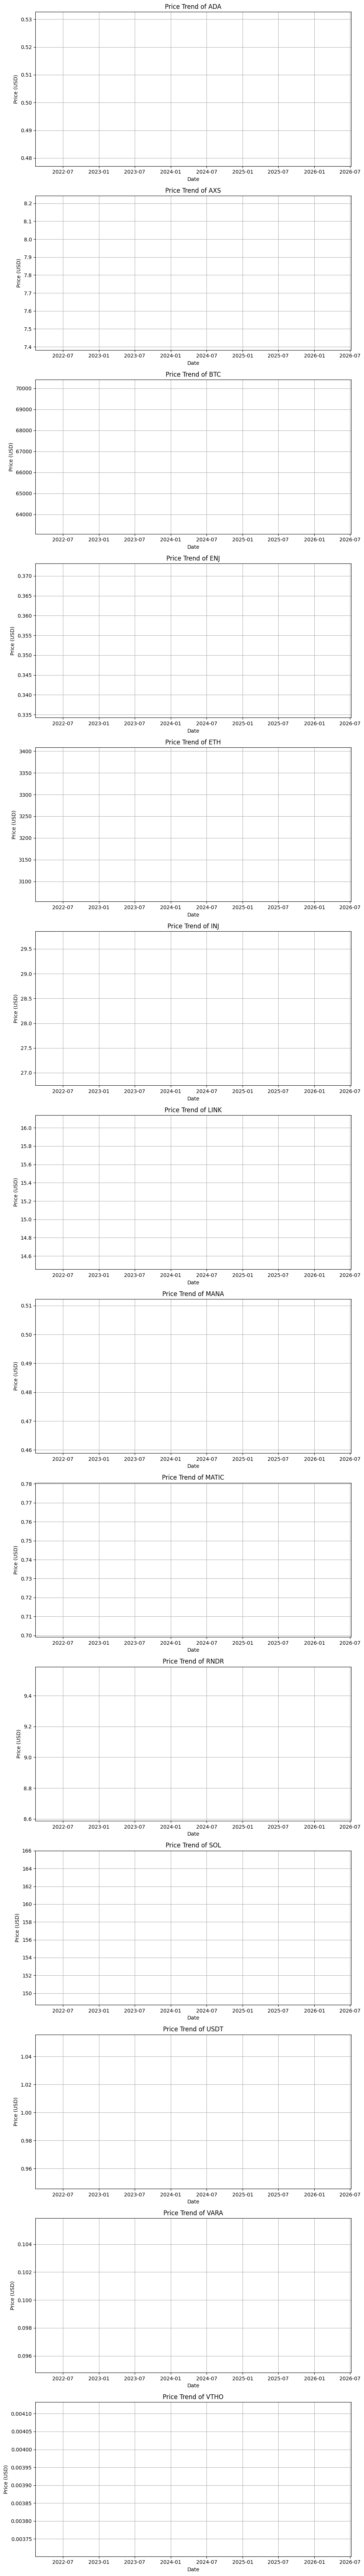

In [337]:
import matplotlib.pyplot as plt

# Adjust the subplot setup if there's only one crypto to prevent indexing errors
single_plot = len(cryptos) == 1
fig, axs = plt.subplots(len(cryptos), 1, figsize=(10, 5 * len(cryptos)), squeeze=False)

for i, (key, df) in enumerate(cryptos.items()):
    ax = axs[i][0] if not single_plot else axs[0]
    if not df['quote.USD.last_updated'].isna().all() and not df['quote.USD.price'].isna().all():
        # Ensure data is sorted by date to avoid potential plotting issues
        df_sorted = df.dropna(subset=['quote.USD.last_updated', 'quote.USD.price']).sort_values('quote.USD.last_updated')
        if not df_sorted.empty:
            ax.plot(df_sorted['quote.USD.last_updated'], df_sorted['quote.USD.price'])
            ax.set_title(f'Price Trend of {key}')
            ax.set_xlabel('Date')
            ax.set_ylabel('Price (USD)')
            ax.grid(True)
        else:
            ax.text(0.5, 0.5, 'Filtered data is empty, no valid points to plot', horizontalalignment='center', verticalalignment='center')
    else:
        ax.text(0.5, 0.5, 'Data not available or insufficient for plotting', horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

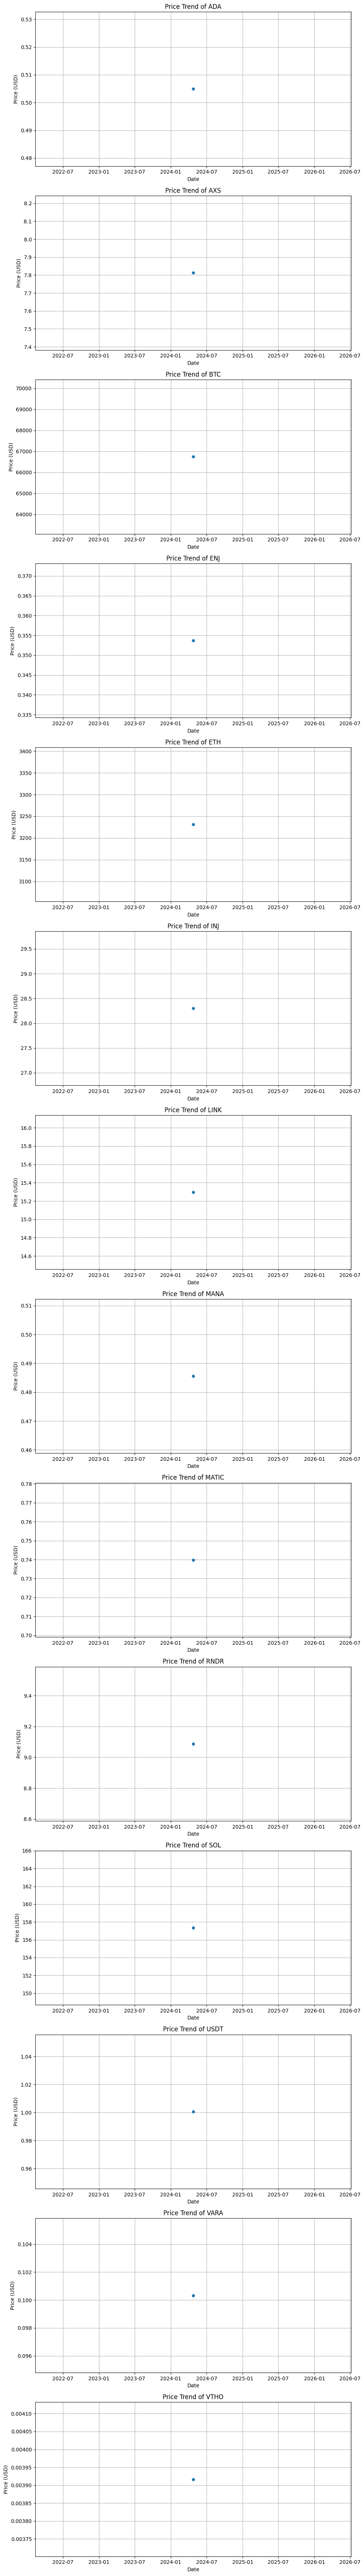

In [338]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(cryptos), 1, figsize=(10, 5 * len(cryptos)), squeeze=False)

for i, (key, df) in enumerate(cryptos.items()):
    ax = axs[i][0] if not single_plot else axs[0]
    if not df['quote.USD.last_updated'].isna().all() and not df['quote.USD.price'].isna().all():
        # Include markers on the plot to visualize single data points
        ax.plot(df['quote.USD.last_updated'], df['quote.USD.price'], marker='o', linestyle='-', markersize=5)
        ax.set_title(f'Price Trend of {key}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price (USD)')
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Data not available or insufficient for plotting', horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

In [339]:
ax.scatter(df['quote.USD.last_updated'], df['quote.USD.price'], color='red')  # Show the point
ax.annotate(f'Price: {df["quote.USD.price"].iloc[0]} USD\nDate: {df["quote.USD.last_updated"].iloc[0]}',
             (df['quote.USD.last_updated'].iloc[0], df['quote.USD.price'].iloc[0]),
             textcoords="offset points",  # how to position the text
             xytext=(0,10),  # distance from text to points (x,y)
             ha='center')  # horizontal alignment can be left, right or center

Text(0, 10, 'Price: 0.0039165325929294776 USD\nDate: 2024-04-24 01:14:00+00:00')

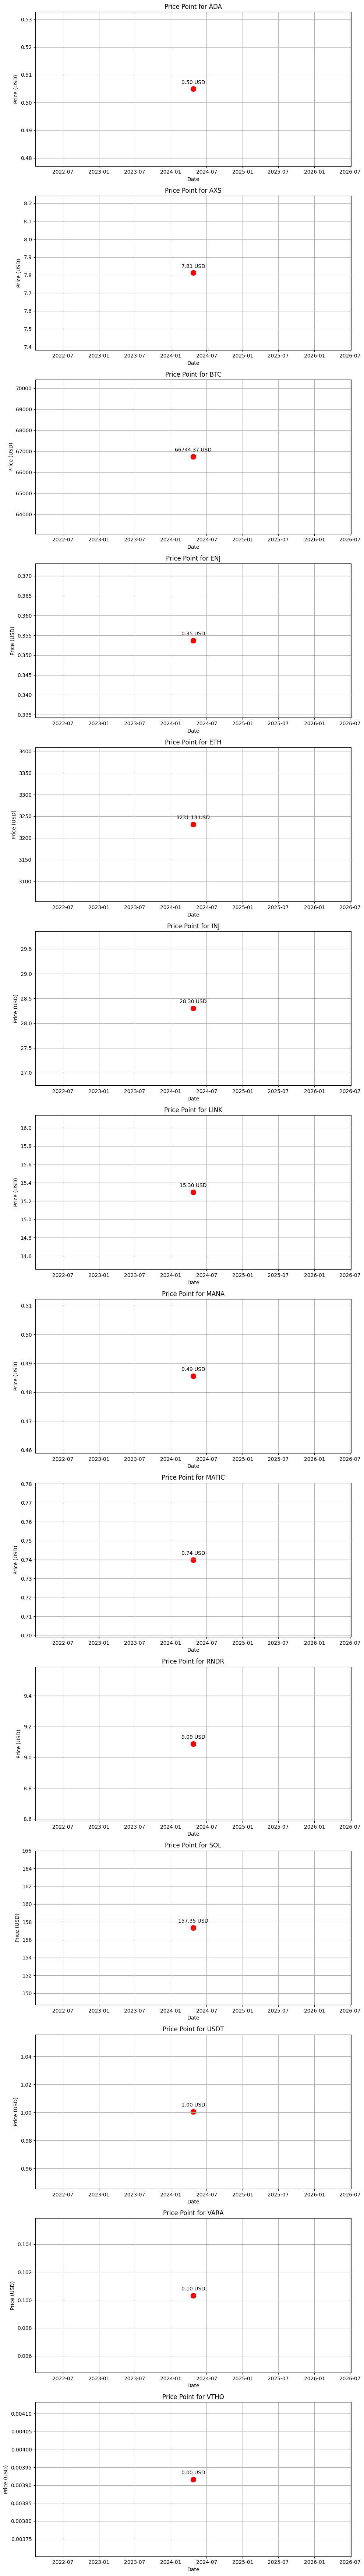

In [340]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(cryptos), 1, figsize=(10, 5 * len(cryptos)), squeeze=False)

for i, (key, df) in enumerate(cryptos.items()):
    ax = axs[i][0] if not single_plot else axs[0]
    if not df['quote.USD.last_updated'].isna().all() and not df['quote.USD.price'].isna().all():
        # Plot with markers
        ax.scatter(df['quote.USD.last_updated'], df['quote.USD.price'], color='red', s=100)  # s is the size of the marker
        ax.annotate(f'{df["quote.USD.price"].iloc[0]:.2f} USD',
                    (df['quote.USD.last_updated'].iloc[0], df['quote.USD.price'].iloc[0]),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')
        ax.set_title(f'Price Point for {key}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price (USD)')
        ax.grid(True)
    else:
        ax.text(0.5, 0.5, 'Data not available or insufficient for plotting', horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

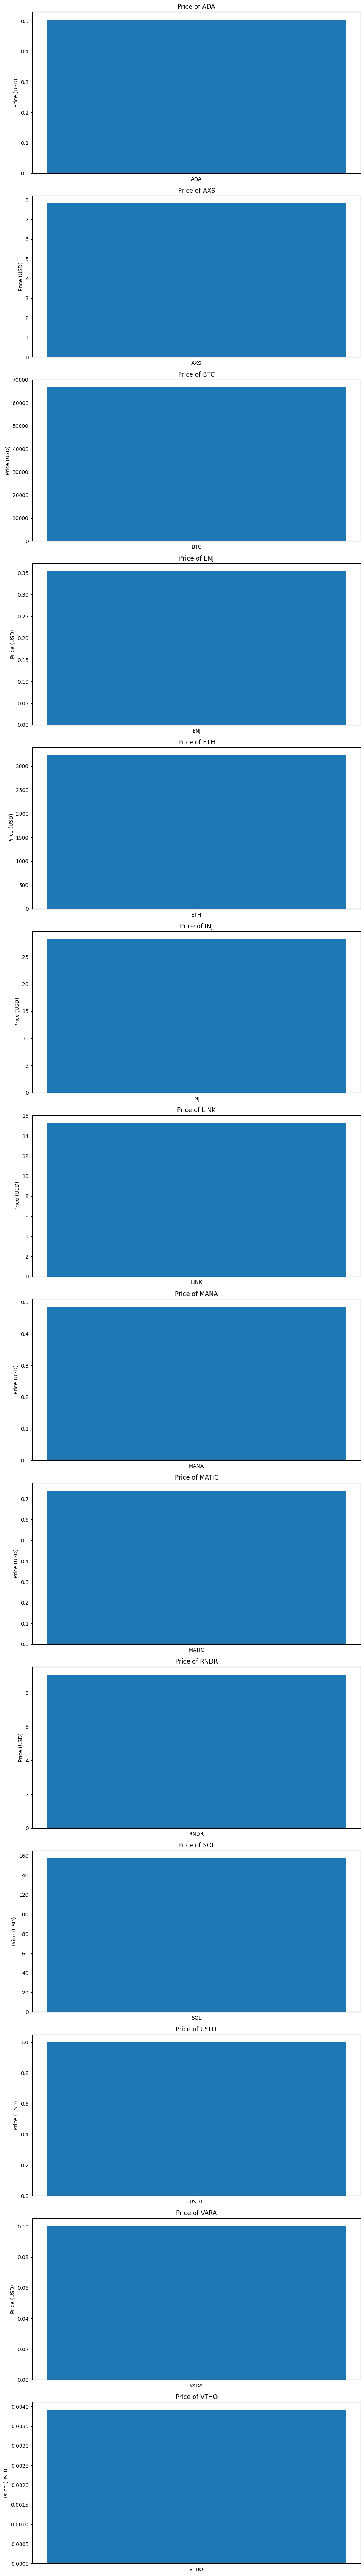

In [341]:
fig, axs = plt.subplots(len(cryptos), 1, figsize=(10, 5 * len(cryptos)), squeeze=False)

for i, (key, df) in enumerate(cryptos.items()):
    ax = axs[i][0] if not single_plot else axs[0]
    if not df['quote.USD.last_updated'].isna().all() and not df['quote.USD.price'].isna().all():
        ax.bar(key, df['quote.USD.price'].iloc[0])
        ax.set_title(f'Price of {key}')
        ax.set_ylabel('Price (USD)')
    else:
        ax.text(0.5, 0.5, 'Data not available or insufficient for plotting', horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

In [342]:
# Print a simple textual presentation of the data
for key, df in cryptos.items():
    if not df.empty:
        price = df['quote.USD.price'].iloc[0]
        date = df['quote.USD.last_updated'].iloc[0]
        print(f"{key}: Price = {price:.2f} USD (as of {date})")
    else:
        print(f"{key}: Data not available")

ADA: Price = 0.50 USD (as of 2024-04-24 01:14:00+00:00)
AXS: Price = 7.81 USD (as of 2024-04-24 01:15:00+00:00)
BTC: Price = 66744.37 USD (as of 2024-04-24 01:15:00+00:00)
ENJ: Price = 0.35 USD (as of 2024-04-24 01:15:00+00:00)
ETH: Price = 3231.13 USD (as of 2024-04-24 01:14:00+00:00)
INJ: Price = 28.30 USD (as of 2024-04-24 01:14:00+00:00)
LINK: Price = 15.30 USD (as of 2024-04-24 01:14:00+00:00)
MANA: Price = 0.49 USD (as of 2024-04-24 01:14:00+00:00)
MATIC: Price = 0.74 USD (as of 2024-04-24 01:14:00+00:00)
RNDR: Price = 9.09 USD (as of 2024-04-24 01:14:00+00:00)
SOL: Price = 157.35 USD (as of 2024-04-24 01:14:00+00:00)
USDT: Price = 1.00 USD (as of 2024-04-24 01:14:00+00:00)
VARA: Price = 0.10 USD (as of 2024-04-24 01:14:00+00:00)
VTHO: Price = 0.00 USD (as of 2024-04-24 01:14:00+00:00)


In [282]:
df.head()

,status,data
timestamp,2024-04-24T01:16:38.951Z,NaN
error_code,0,NaN
error_message,None,NaN
elapsed,48,NaN
credit_count,1,NaN


In [283]:
df.describe()


,status,data
count,4,14
unique,4,14
top,2024-04-24T01:16:38.951Z,"{'id': 2010, 'name': 'Cardano', 'symbol': 'ADA..."
freq,1,1


In [284]:
df.info


<bound method DataFrame.info of                                  status  \
timestamp      2024-04-24T01:16:38.951Z   
error_code                            0   
error_message                      None   
elapsed                              48   
credit_count                          1   
notice                             None   
ADA                                 NaN   
AXS                                 NaN   
BTC                                 NaN   
ENJ                                 NaN   
ETH                                 NaN   
INJ                                 NaN   
LINK                                NaN   
MANA                                NaN   
MATIC                               NaN   
RNDR                                NaN   
SOL                                 NaN   
USDT                                NaN   
VARA                                NaN   
VTHO                                NaN   

                                                            data

In [285]:
plt.figure(figsize=(10,6))
#plt.scatter(df['id'], df['name'])
#plt.title('Relationship between Column 1 and Column 2')
#plt.xlabel('Column 1')
#plt.ylabel('Column 2')
plt.show()

<Figure size 1000x600 with 0 Axes>

In [286]:
# Check if 'data' column contains any non-null values
if pd.notna(df['data'].iloc[0]):
    # Attempt to create data_df from the 'data' column
    try:
        data_df = pd.json_normalize(df['data'])
        print("Flattened DataFrame:", data_df.head())
    except Exception as e:
        print("Error flattening data:", e)
else:
    print("No data available to flatten.")

No data available to flatten.


In [287]:
# Display the non-null entries in the 'data' column to see if there's anything to work with
print(df['data'].dropna())

ADA      {'id': 2010, 'name': 'Cardano', 'symbol': 'ADA...
AXS      {'id': 6783, 'name': 'Axie Infinity', 'symbol'...
BTC      {'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', ...
ENJ      {'id': 2130, 'name': 'Enjin Coin', 'symbol': '...
ETH      {'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...
INJ      {'id': 7226, 'name': 'Injective', 'symbol': 'I...
LINK     {'id': 1975, 'name': 'Chainlink', 'symbol': 'L...
MANA     {'id': 1966, 'name': 'Decentraland', 'symbol':...
MATIC    {'id': 3890, 'name': 'Polygon', 'symbol': 'MAT...
RNDR     {'id': 5690, 'name': 'Render', 'symbol': 'RNDR...
SOL      {'id': 5426, 'name': 'Solana', 'symbol': 'SOL'...
USDT     {'id': 825, 'name': 'Tether USDt', 'symbol': '...
VARA     {'id': 28067, 'name': 'Vara Network', 'symbol'...
VTHO     {'id': 3012, 'name': 'VeThor Token', 'symbol':...
Name: data, dtype: object


In [288]:
# Check if there's any non-null value in the 'data' column
if df['data'].notna().any():
    try:
        # Convert the first non-null item to see its structure
        sample_data = pd.json_normalize(df[df['data'].notna()]['data'].iloc[0])
        print("Sample flattened data:", sample_data)
        
        # Assuming all items have a similar structure, create data_df from all non-null data entries
        data_df = pd.json_normalize(df['data'].dropna().tolist())
        print("Flattened DataFrame:", data_df.head())
    except Exception as e:
        print("Error flattening data:", e)
else:
    print("No usable data available to flatten.")

Sample flattened data:      id     name symbol     slug  num_market_pairs                date_added  \
0  2010  Cardano    ADA  cardano              1150  2017-10-01T00:00:00.000Z   

                                                tags   max_supply  \
0  [dpos, pos, platform, research, smart-contract...  45000000000   

   circulating_supply  total_supply  ...  quote.USD.percent_change_24h  \
0        3.563396e+10  3.681293e+10  ...                      -2.45769   

   quote.USD.percent_change_7d quote.USD.percent_change_30d  \
0                    10.756698                   -21.368022   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                    -13.204905                      6.398086   

  quote.USD.market_cap quote.USD.market_cap_dominance  \
0         1.799063e+10                         0.7317   

  quote.USD.fully_diluted_market_cap quote.USD.tvl    quote.USD.last_updated  
0                       2.271930e+10          None  2024-04-24T01:14:00.000Z

In [289]:
# Example for more complex nested structures
if df['data'].notna().any():
    try:
        # Process each non-null item individually and concatenate into a DataFrame
        all_data_frames = [pd.json_normalize(item) for item in df['data'].dropna()]
        data_df = pd.concat(all_data_frames, ignore_index=True)
        print("Flattened DataFrame:", data_df.head())
    except Exception as e:
        print("Error processing complex data structures:", e)
else:
    print("No usable data in complex structures available to flatten.")

Flattened DataFrame:      id           name symbol           slug  num_market_pairs  \
0  2010        Cardano    ADA        cardano              1150   
1  6783  Axie Infinity    AXS  axie-infinity               444   
2     1        Bitcoin    BTC        bitcoin             11017   
3  2130     Enjin Coin    ENJ     enjin-coin               409   
4  1027       Ethereum    ETH       ethereum              8859   

                 date_added  \
0  2017-10-01T00:00:00.000Z   
1  2020-08-31T00:00:00.000Z   
2  2010-07-13T00:00:00.000Z   
3  2017-11-01T00:00:00.000Z   
4  2015-08-07T00:00:00.000Z   

                                                tags   max_supply  \
0  [dpos, pos, platform, research, smart-contract...  45000000000   
1  [collectibles-nfts, gaming, binance-launchpad,...    270000000   
2  [mineable, pow, sha-256, store-of-value, state...     21000000   
3  [media, vr-ar, collectibles-nfts, gaming, polk...         None   
4  [pos, smart-contracts, ethereum-ecosystem, coi.

In [290]:
if df['data'].notna().any():
    try:
        # Process each non-null item individually
        all_data_frames = [pd.json_normalize(item) for item in df['data'].dropna()]
        
        # Filter out empty or all-NA data frames before concatenating
        all_data_frames = [df for df in all_data_frames if not df.empty and not df.isna().all().all()]
        
        # Concatenate the list of DataFrames
        if all_data_frames:  # Check if the list is not empty
            data_df = pd.concat(all_data_frames, ignore_index=True)
            print("Flattened DataFrame:", data_df.head())
        else:
            print("All processed data frames were empty or NA.")
    except Exception as e:
        print("Error processing complex data structures:", e)
else:
    print("No usable data in complex structures available to flatten.")

Flattened DataFrame:      id           name symbol           slug  num_market_pairs  \
0  2010        Cardano    ADA        cardano              1150   
1  6783  Axie Infinity    AXS  axie-infinity               444   
2     1        Bitcoin    BTC        bitcoin             11017   
3  2130     Enjin Coin    ENJ     enjin-coin               409   
4  1027       Ethereum    ETH       ethereum              8859   

                 date_added  \
0  2017-10-01T00:00:00.000Z   
1  2020-08-31T00:00:00.000Z   
2  2010-07-13T00:00:00.000Z   
3  2017-11-01T00:00:00.000Z   
4  2015-08-07T00:00:00.000Z   

                                                tags   max_supply  \
0  [dpos, pos, platform, research, smart-contract...  45000000000   
1  [collectibles-nfts, gaming, binance-launchpad,...    270000000   
2  [mineable, pow, sha-256, store-of-value, state...     21000000   
3  [media, vr-ar, collectibles-nfts, gaming, polk...         None   
4  [pos, smart-contracts, ethereum-ecosystem, coi.

In [291]:
import pandas as pd

if df['data'].notna().any():
    try:
        # Process each non-null item individually
        all_data_frames = [pd.json_normalize(item) for item in df['data'].dropna()]

        # Additional filtering to remove all-NA columns
        all_data_frames = [df.loc[:, df.notna().any()] for df in all_data_frames if not df.empty]

        # Filter out DataFrames that became empty after removing all-NA columns
        all_data_frames = [df for df in all_data_frames if not df.empty and not df.isna().all().all()]
        
        # Concatenate the list of DataFrames
        if all_data_frames:
            data_df = pd.concat(all_data_frames, ignore_index=True)
            print("Flattened DataFrame:", data_df.head())
        else:
            print("All processed data frames were empty or NA.")
    except Exception as e:
        print("Error processing complex data structures:", e)
else:
    print("No usable data in complex structures available to flatten.")

Flattened DataFrame:      id           name symbol           slug  num_market_pairs  \
0  2010        Cardano    ADA        cardano              1150   
1  6783  Axie Infinity    AXS  axie-infinity               444   
2     1        Bitcoin    BTC        bitcoin             11017   
3  2130     Enjin Coin    ENJ     enjin-coin               409   
4  1027       Ethereum    ETH       ethereum              8859   

                 date_added  \
0  2017-10-01T00:00:00.000Z   
1  2020-08-31T00:00:00.000Z   
2  2010-07-13T00:00:00.000Z   
3  2017-11-01T00:00:00.000Z   
4  2015-08-07T00:00:00.000Z   

                                                tags    max_supply  \
0  [dpos, pos, platform, research, smart-contract...  4.500000e+10   
1  [collectibles-nfts, gaming, binance-launchpad,...  2.700000e+08   
2  [mineable, pow, sha-256, store-of-value, state...  2.100000e+07   
3  [media, vr-ar, collectibles-nfts, gaming, polk...           NaN   
4  [pos, smart-contracts, ethereum-ecosystem,

In [292]:
# Drop columns where all entries are NaN
data_df.dropna(axis=1, how='all', inplace=True)

In [293]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [294]:
# Example for more complex nested structures
if df['data'].notna().any():
    try:
        # Process each non-null item individually and concatenate into a DataFrame
        all_data_frames = [pd.json_normalize(item) for item in df['data'].dropna()]
        data_df = pd.concat(all_data_frames, ignore_index=True)
        print("Flattened DataFrame:", data_df.head())
    except Exception as e:
        print("Error processing complex data structures:", e)
else:
    print("No usable data in complex structures available to flatten.")

Flattened DataFrame:      id           name symbol           slug  num_market_pairs  \
0  2010        Cardano    ADA        cardano              1150   
1  6783  Axie Infinity    AXS  axie-infinity               444   
2     1        Bitcoin    BTC        bitcoin             11017   
3  2130     Enjin Coin    ENJ     enjin-coin               409   
4  1027       Ethereum    ETH       ethereum              8859   

                 date_added  \
0  2017-10-01T00:00:00.000Z   
1  2020-08-31T00:00:00.000Z   
2  2010-07-13T00:00:00.000Z   
3  2017-11-01T00:00:00.000Z   
4  2015-08-07T00:00:00.000Z   

                                                tags   max_supply  \
0  [dpos, pos, platform, research, smart-contract...  45000000000   
1  [collectibles-nfts, gaming, binance-launchpad,...    270000000   
2  [mineable, pow, sha-256, store-of-value, state...     21000000   
3  [media, vr-ar, collectibles-nfts, gaming, polk...         None   
4  [pos, smart-contracts, ethereum-ecosystem, coi.

In [295]:
# Display basic information and statistics about the newly created DataFrame
if 'data_df' in locals():
    print(data_df.describe())
    print(data_df.info())

                 id  num_market_pairs  circulating_supply  total_supply  \
count     14.000000         14.000000        1.400000e+01  1.400000e+01   
mean    5002.000000       7913.428571        1.691722e+10  1.797240e+10   
std     7015.370784      22121.138974        3.423077e+10  3.448568e+10   
min        1.000000          3.000000        1.968934e+07  1.968934e+07   
25%     1968.250000        381.250000        2.038462e+08  3.355165e+08   
50%     2571.000000        573.000000        5.469940e+08  1.400174e+09   
75%     5624.000000       1643.750000        7.901370e+09  1.000000e+10   
max    28067.000000      83850.000000        1.104635e+11  1.129366e+11   

       is_active    cmc_rank  is_fiat  self_reported_circulating_supply  \
count       14.0   14.000000     14.0                      4.000000e+00   
mean         1.0   93.500000      0.0                      1.933599e+10   
std          0.0  166.911192      0.0                      3.728133e+10   
min          1.0    1.00

In [296]:
print(df.columns)

Index(['status', 'data'], dtype='object')


In [297]:
print(data_df.columns)

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active',
       'infinite_supply', 'platform', 'cmc_rank', 'is_fiat',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote.USD.price', 'quote.USD.volume_24h',
       'quote.USD.volume_change_24h', 'quote.USD.percent_change_1h',
       'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d',
       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d',
       'quote.USD.percent_change_90d', 'quote.USD.market_cap',
       'quote.USD.market_cap_dominance', 'quote.USD.fully_diluted_market_cap',
       'quote.USD.tvl', 'quote.USD.last_updated', 'platform.id',
       'platform.name', 'platform.symbol', 'platform.slug',
       'platform.token_address'],
      dtype='object')


In [298]:
print(data_df.head)

<bound method NDFrame.head of        id           name symbol           slug  num_market_pairs  \
0    2010        Cardano    ADA        cardano              1150   
1    6783  Axie Infinity    AXS  axie-infinity               444   
2       1        Bitcoin    BTC        bitcoin             11017   
3    2130     Enjin Coin    ENJ     enjin-coin               409   
4    1027       Ethereum    ETH       ethereum              8859   
5    7226      Injective    INJ      injective               366   
6    1975      Chainlink   LINK      chainlink              1736   
7    1966   Decentraland   MANA   decentraland               491   
8    3890        Polygon  MATIC        polygon              1367   
9    5690         Render   RNDR         render               372   
10   5426         Solana    SOL         solana               655   
11    825    Tether USDt   USDT         tether             83850   
12  28067   Vara Network   VARA   vara-network                 3   
13   3012   VeThor

In [299]:
import pandas as pd
import matplotlib.pyplot as plt

# Load JSON data from file
file_path = '/Users/farhadabasahl/Spring2024_ZooKeeper_Integration_with_Data_Mining_FA/data/cryptocurrency_data.json'
with open(file_path, 'r') as file:
    data = pd.read_json(file)

# Normalize the nested JSON data
df = pd.json_normalize(data['data'], sep='_')

# Display columns to verify names and check structure
print(df.columns)

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active',
       'infinite_supply', 'platform', 'cmc_rank', 'is_fiat',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote_USD_price', 'quote_USD_volume_24h',
       'quote_USD_volume_change_24h', 'quote_USD_percent_change_1h',
       'quote_USD_percent_change_24h', 'quote_USD_percent_change_7d',
       'quote_USD_percent_change_30d', 'quote_USD_percent_change_60d',
       'quote_USD_percent_change_90d', 'quote_USD_market_cap',
       'quote_USD_market_cap_dominance', 'quote_USD_fully_diluted_market_cap',
       'quote_USD_tvl', 'quote_USD_last_updated', 'platform_id',
       'platform_name', 'platform_symbol', 'platform_slug',
       'platform_token_address'],
      dtype='object')


In [300]:
# Convert market cap and volume to numeric, handling any conversion errors
df['quote_USD_market_cap'] = pd.to_numeric(df['quote_USD_market_cap'], errors='coerce')
df['quote_USD_volume_24h'] = pd.to_numeric(df['quote_USD_volume_24h'], errors='coerce')

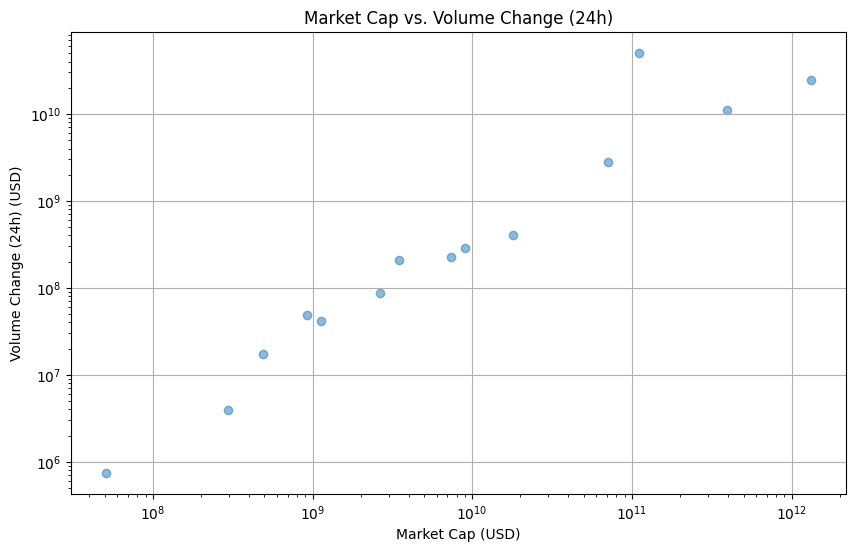

In [301]:
plt.figure(figsize=(10, 6))
plt.scatter(df['quote_USD_market_cap'], df['quote_USD_volume_24h'], alpha=0.5)
plt.title('Market Cap vs. Volume Change (24h)')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Volume Change (24h) (USD)')
plt.xscale('log')  # Use logarithmic scale if the range is large
plt.yscale('log')
plt.grid(True)
plt.show()

In [302]:
# Check for missing data
if df['quote_USD_market_cap'].isnull().any() or df['quote_USD_volume_24h'].isnull().any():
    print("Warning: Missing data detected. Plot may be incomplete.")

In [303]:
import pandas as pd

# Assuming 'data' is your loaded JSON DataFrame
#df_normalized = pd.json_normalize(data_df, sep='_')
#df_normalized
df = pd.json_normalize(data['data'], sep='_')
# Convert 'last_updated' to a datetime format for better handling in plots
df['quote_USD_last_updated'] = pd.to_datetime(df['quote_USD_last_updated'])

# Convert 'price' to numeric for plotting
df['quote_USD_price'] = pd.to_numeric(df['quote_USD_price'], errors='coerce')

# Check the DataFrame
print(df[['name', 'quote_USD_last_updated', 'quote_USD_price']].head())

  name quote_USD_last_updated  quote_USD_price
0  NaN                    NaT              NaN
1  NaN                    NaT              NaN
2  NaN                    NaT              NaN
3  NaN                    NaT              NaN
4  NaN                    NaT              NaN


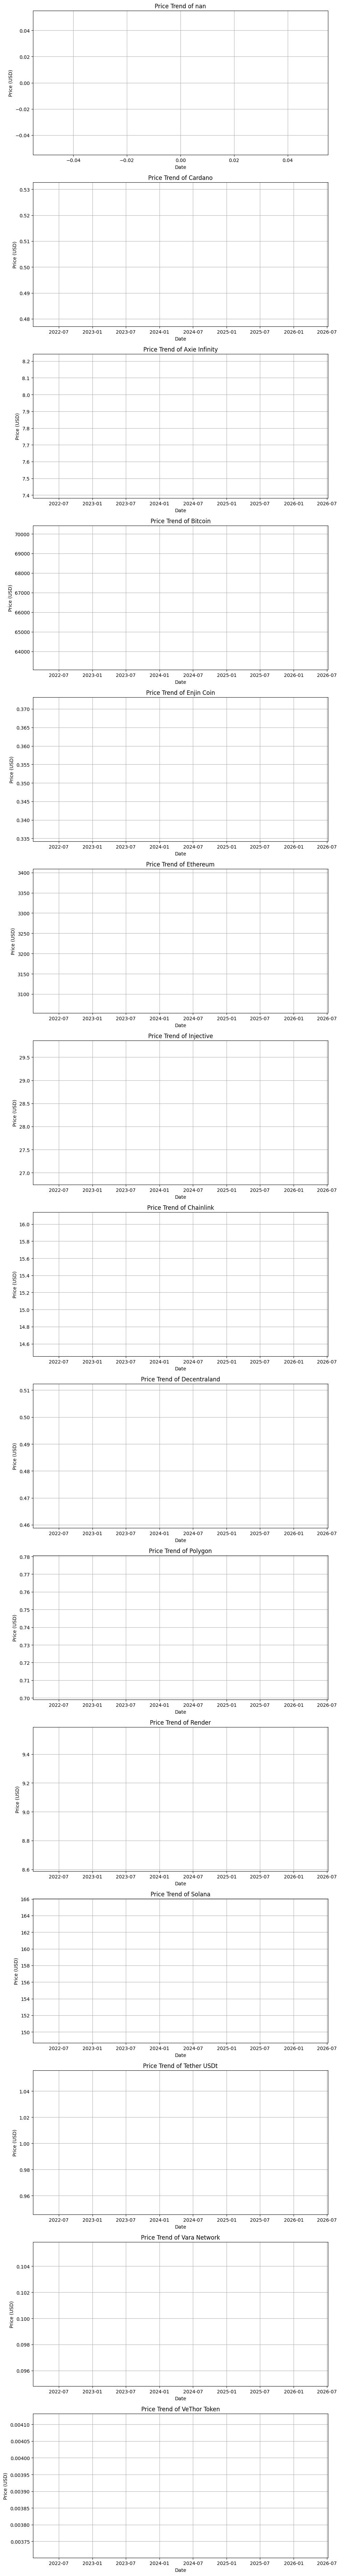

In [304]:
import matplotlib.pyplot as plt

# Get a list of unique cryptocurrencies
cryptos = df['name'].unique()

# Create a figure and set of subplots
fig, axs = plt.subplots(len(cryptos), 1, figsize=(10, 5 * len(cryptos)))

for i, crypto in enumerate(cryptos):
    subset = df[df['name'] == crypto]
    axs[i].plot(subset['quote_USD_last_updated'], subset['quote_USD_price'])
    axs[i].set_title(f'Price Trend of {crypto}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price (USD)')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [305]:
import json

# Assuming the JSON data is stored in a variable `data`
print(json.dumps(data['data'][0], indent=2))  # Print the structure of the first item to understand it

NaN


In [306]:
# Adjust the normalization line if necessary based on the JSON structure
df = pd.json_normalize(data['data'], sep='_')

In [307]:
# Print all column names to verify
print(df.columns)

Index(['id', 'name', 'symbol', 'slug', 'num_market_pairs', 'date_added',
       'tags', 'max_supply', 'circulating_supply', 'total_supply', 'is_active',
       'infinite_supply', 'platform', 'cmc_rank', 'is_fiat',
       'self_reported_circulating_supply', 'self_reported_market_cap',
       'tvl_ratio', 'last_updated', 'quote_USD_price', 'quote_USD_volume_24h',
       'quote_USD_volume_change_24h', 'quote_USD_percent_change_1h',
       'quote_USD_percent_change_24h', 'quote_USD_percent_change_7d',
       'quote_USD_percent_change_30d', 'quote_USD_percent_change_60d',
       'quote_USD_percent_change_90d', 'quote_USD_market_cap',
       'quote_USD_market_cap_dominance', 'quote_USD_fully_diluted_market_cap',
       'quote_USD_tvl', 'quote_USD_last_updated', 'platform_id',
       'platform_name', 'platform_symbol', 'platform_slug',
       'platform_token_address'],
      dtype='object')


In [308]:
# Assuming correct field names have been identified
df['quote_USD_last_updated'] = pd.to_datetime(df['quote_USD_last_updated'])
df['quote_USD_price'] = pd.to_numeric(df['quote_USD_price'], errors='coerce')

# Check the DataFrame
print(df[['name', 'quote_USD_last_updated', 'quote_USD_price']].head())

  name quote_USD_last_updated  quote_USD_price
0  NaN                    NaT              NaN
1  NaN                    NaT              NaN
2  NaN                    NaT              NaN
3  NaN                    NaT              NaN
4  NaN                    NaT              NaN


In [309]:
# Check for missing data
print(df.isna().sum())

id                                     6
name                                   6
symbol                                 6
slug                                   6
num_market_pairs                       6
date_added                             6
tags                                   6
max_supply                            14
circulating_supply                     6
total_supply                           6
is_active                              6
infinite_supply                        6
platform                              20
cmc_rank                               6
is_fiat                                6
self_reported_circulating_supply      16
self_reported_market_cap              16
tvl_ratio                             20
last_updated                           6
quote_USD_price                        6
quote_USD_volume_24h                   6
quote_USD_volume_change_24h            6
quote_USD_percent_change_1h            6
quote_USD_percent_change_24h           6
quote_USD_percen

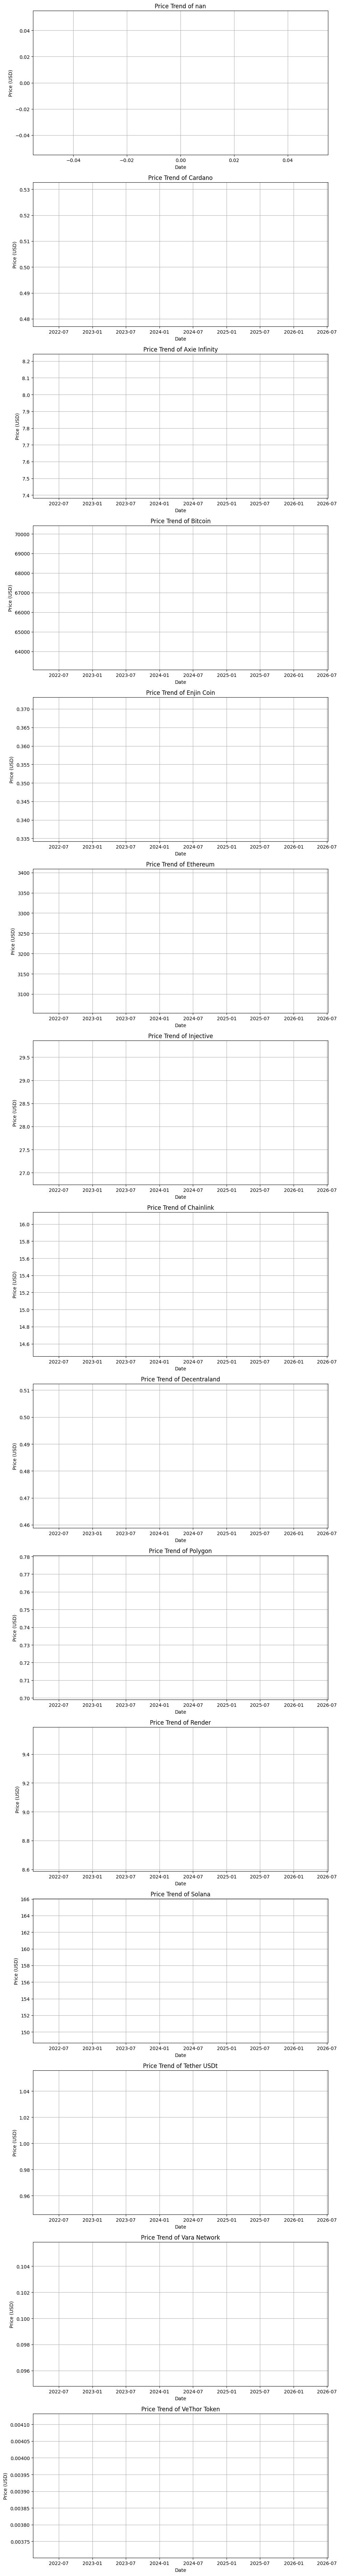

In [310]:
import matplotlib.pyplot as plt

# Get a list of unique cryptocurrencies
cryptos = df['name'].unique()

# Create a figure and set of subplots
fig, axs = plt.subplots(len(cryptos), 1, figsize=(10, 5 * len(cryptos)))

for i, crypto in enumerate(cryptos):
    subset = df[df['name'] == crypto]
    axs[i].plot(subset['quote_USD_last_updated'], subset['quote_USD_price'])
    axs[i].set_title(f'Price Trend of {crypto}')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price (USD)')
    axs[i].grid(True)

plt.tight_layout()
plt.show()

In [311]:
import json

# If you have the JSON data loaded in a variable `data`
print(json.dumps(data['data'][0], indent=4))  # Print the structure of the first item

NaN
